## Consignas TP 5: números peudoaleatoreos, Simulaciones por Monte Carlo
### 0. Cree dos vectores de 1000 números random entre -250 y 250, a continuación plotee una distribucion con los valores que obtuvo.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

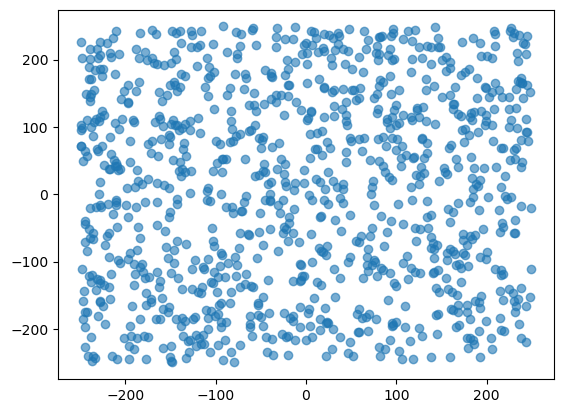

In [18]:
x = 1000
inicio = -250
fin = 250

random_list = np.random.random(1000) * (fin - inicio) + inicio
random_list2 = np.random.random(1000) * (fin - inicio) + inicio
plt.scatter(random_list,random_list2, alpha = 0.6)

### 1. Calcule la probabilidad de obtener un número 'x' luego de 'n' veces de lanzar un dado, guarde los valores en una lista y realice un histograma con los resultados, qué conclusiones puede sacar a medida que varía 'n'?

la probabilidad de que salga el 6 es del 16.0% en 50 tiradas

El set de datos ( primeros 25 numeros) :
[3 4 2 2 4 5 2 6 1 5 3 4 6 5 1 5 4 4 1 2 1 2 6 3 1]


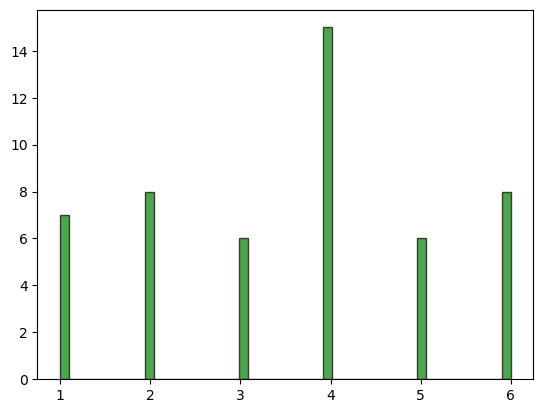

In [19]:
#para ello vamos a crear una función que lo haga por nosotros ;)

def tirar_dado(n):
    # n: la cantidad de veces que lo quiero tirar
    # recordando que la funcion random nos devuelve valores decimales, debemos convertir un intervalo entre 1.0 y 6.99 a uno entre 1 y 6
    return (np.random.random(n) * 6 + 1).astype(int) 

#creamos otra funcion que nos devuelva la probabilidad

def probabilidad(dados, x):
    # dados: es el vector que nos va a devolver la funcion tirar_dado
    # x: es el numero al que le quiero calcular la probabilidad
    contador = 0 #donde voy a sumar cada vez que aparezca mi numero
    for dado in dados:
        if dado == x:
            contador += 1
    return round(contador / len(dados),3)

n = 50
x = 6 # quiero ver cuantas veces sale el 6

dados = tirar_dado(n)
prob =  probabilidad(dados, x)

print(f'la probabilidad de que salga el {x} es del {prob*100}% en {n} tiradas')
print('')
print('El set de datos ( primeros 25 numeros) :')
print(dados[:25])
plt.hist(dados, bins = 48, color = 'green', ec = 'black', alpha = 0.7)
plt.show()

### 2. Determine la integral $\int_0^4 x^{2} dx$ 

21.248


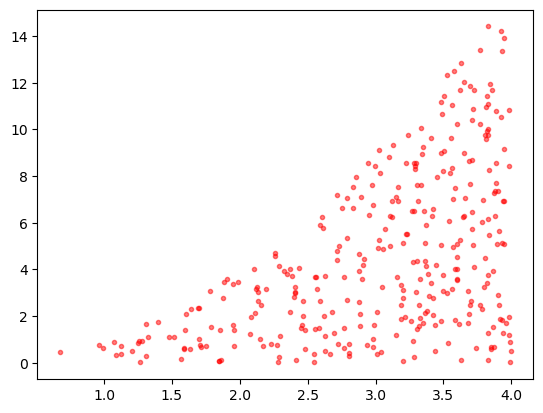

In [20]:
contador = 0
n = 1000
max = 4

def f(x):
    return x**2

for i in range(n):
    
    x = np.random.random() * max
    y = np.random.random() * f(max)

    if y < f(x):
        contador +=1
        plt.plot(x,y,'.r',alpha = 0.5)
        
area = max * f(max)
integral = (contador / n) * area 
print(integral)
plt.show()


### 3. Calcule el valor de $\pi$<br><br>

Para estimar este valor, recordemos el ejercicio $0$, donde les pedí hagan un gráfico de distribución. Ven que les devolvió un ploteo cuadrado también? bueno, vamos a utilizar esto para crear un círculo dentro de este cuadrado, y ver  a partir de la relación entre estas superficies y los puntos generados pseudoaleatoreamente como obtener el valor de $\pi$.

valor estimado de pi para 1000 iteraciones: 3.156


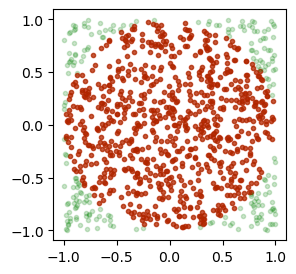

In [21]:
n = 1000 #cantidad de puntos
r = 1 #radio de la circunferencia
fin = r #limite max valor numero pseudoaleatorio
inicio = -r #limite min valor numero pseudoaleatorio
cuadrado = 0 #contador
circulo = 0 #contador
 
plt.figure(figsize=(3,3))

for i in range(n):
    # como estoy trabajando con dos dimensiones, voy a generar valores random para 'x' e 'y' entre r y -r
    rand_x = np.random.rand() * (fin - inicio) + (inicio) 
    rand_y = np.random.rand() * (fin - inicio) + (inicio)  
 
    # para ver que caiga dentro del circulo de radio r
    distancia_centro = np.sqrt(rand_x**2 + rand_y**2)

    if distancia_centro <= r:
        circulo += 1
        plt.plot(rand_x,rand_y,'.r',alpha = 0.7)
    cuadrado += 1
    plt.plot(rand_x,rand_y,'.g',alpha = 0.2)

pi = 4 * circulo / cuadrado
print(f'valor estimado de pi para {n} iteraciones: {pi}')
plt.show()

### 4. Calcule la integral de la distribucion de la campana de Gauss.
Al ser una función simétrica, se puede calcular la integral entre 0 e infinito.<br>
Tener en cuenta que el infinito no existe en computación. Limite bien el rectángulo dentro del cuál generará los números aleatorios.<br>
$\int_{-\infty}^{\infty}e^{-x^{2}}dx = \sqrt{\pi}$

1.756


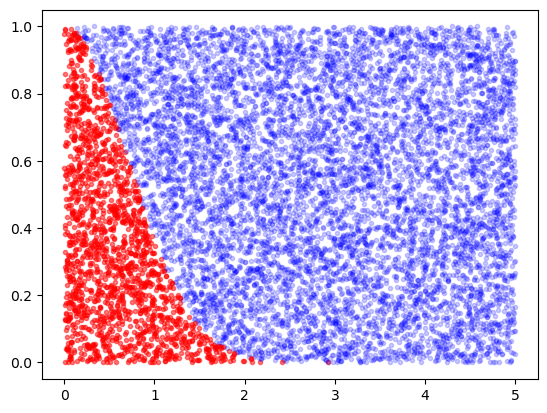

In [22]:
contador = 0
n = 10000

#limito entre 0 y 5 a 'x', y de 0 a 1 a 'y'
min = 0
max_x = 5
max_y = 1 

for i in range (n):
    x = np.random.random() * (max_x - min) + min
    y = np.random.random() 

    if y < np.e**(-x**2):
        contador += 1
        plt.plot(x,y,'.r', alpha= 0.5)
    else:
        plt.plot(x,y,'.b', alpha = 0.2)
    plt.show

integral = contador / n
area = max_x * max_y

#recordando que es simetrica y solo obtuvimos media distribución, multiplicamos por 2 para ver el valor completo
solucion = 2*integral*area
print(solucion)

### 5. Calcule el volumen de 1/8 de esfera 
de radio $r = 4m$ y $ z = \int_0^R \int_0^R \sqrt{R^{2}-x^{2}+y^{2}}dxdy $<br><br>
Para validar esta integral, tenga en cuenta que el volumen de 1/8 de esfera es <br><br>
$volumen =\frac{4}{3}\frac{\pi R^{3}}{8}$


/var/folders/bs/tw4_fj_s65l_vxvt7mr7wb500000gn/T/ipykernel_26829/3745119338.py:14: RuntimeWarning: invalid value encountered in sqrt
  if z <= np.sqrt(r**2 - d):


Vol montecarlo: 33.344 m^3. Vol definicion: 33.510321638291124m^3


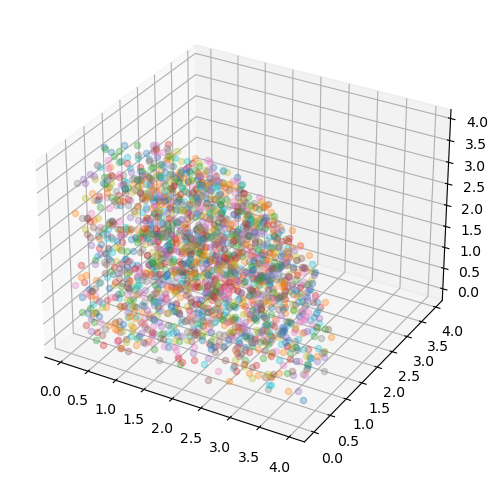

In [23]:
contador = 0
n = 4000
r = 4
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='3d')

for i in range (n):
    #como los nros son positivos, va a estar en el primer octante
    x = np.random.rand() * r
    y = np.random.rand() * r
    z = np.random.rand() * r
    d = x**2 + y**2

    if z <= np.sqrt(r**2 - d):
            contador = contador + 1
            ax.scatter(x,y,z, alpha=0.3) 
            
integral = contador / n
vol_recinto = r**3
vol_mc = integral * vol_recinto
vol_def = ((4/3) * np.pi * r**3 )/ 8 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )
plt.show()




### 6. Campo debido a una esfera con carga 
Se puede definir la magnitud de un campo eléctrico debido a una esfera con carga $Q$ a una distancia $r$ como <br><br>
$E = \frac{1}{4\pi\epsilon_{0}}\frac{Q}{r^{2}}$<br><br>
Si queremos obtener el campo dado por cada cachito de carga que conforma nuestra esfera, y recordando que el campo eléctrico es una magnitud vectorial <br><br>
$d\vec{E}(\vec{r}) = \frac{1}{4\pi\epsilon_{0}}\frac{dq}{|\vec{r}|^{2}}\hat{r}$<br><br>
Siendo $\vec{r}=\vec{r_0}-\vec{r_q}$<br>
Donde $\vec{r_0}$ es la distancia de donde observamos y $\vec{r_q}$ la posición de la carga respecto al centro.<br>
Si sumamos todos los $d\vec{E}$ de cada una de nuestras cargas, obtendremos el campo eléctrico total y podremos contrastarlo contra su magnitud calculada analíticamente.<br><br>
Determinar por MonteCarlo el campo a $5 cm$ debido a una esfera de radio $R = 1.0 cm$ con carga $Q = 3\times10^{-6}C$. <br>


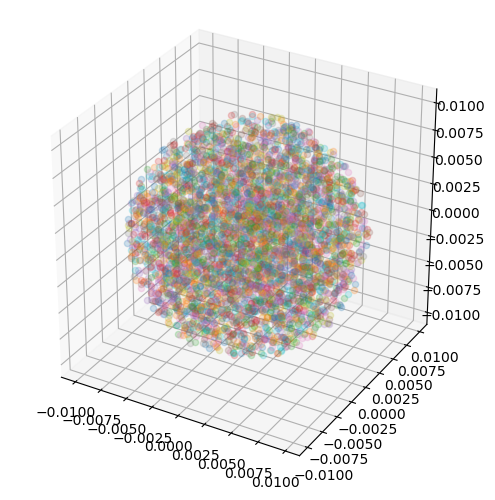

Campo debido a una esfera maciza con carga solución MC: 10772828.94 N/C
Campo debido a una esfera maciza con carga solución teórica: 10800000.0 N/C


In [24]:
k=9e9
Q = 3e-6 # carga total de la esfera
R = 0.01 # radio de la esfera
n = 5000 # n: cantidad de dq
dq = Q / n
ro = np.array([5*R,0,0]) # posición del observador, mientras mas lejos esté, mejor me vá a dar el resultado
Et= k * Q / np.linalg.norm(ro)**2 # solucion teórica!!! (para comparar al final)

def E(rq,ro,q):
    # rq: posición de la carga
    # ro: distancia del observador 
    # q: carga
    # recordemos que el campo debido a una carga dE es una unidad vectorial

    r = ro - rq
    r_unitario = r / np.linalg.norm(r)
    Eq = (k*q/np.linalg.norm(r)**2)*r_unitario
    return Eq

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(aspect = 'equal' , projection='3d')
i=0
Es = np.array([0,0,0]) #campo eléctrico debido a la esfera (donde iremos sumando los dE debidos a cada dQ)

while i < n:
    # para la posicion de 'dq' tengo que generar dos numeros random entre -1 y 1 para mis coordenadas x, y,z.
    rx = R *(np.random.random() * 2-1)
    ry = R *(np.random.random() * 2-1)
    rz = R *(np.random.random() * 2-1)
    #creo el vector posición
    rt = np.array([rx,ry,rz])
    if np.linalg.norm(rt) <= R: # solo la voy a tener en cuenta si el modulo de la posición es menor al radio de la esfera (es decir, la carga está dentro de ella)
        ax.scatter(rt[0],rt[1],rt[2], alpha=0.2)
        Es = Es + E(rt,ro,dq)
        i+=1
plt.show()
print(f'Campo debido a una esfera maciza con carga solución MC: {str(round(np.linalg.norm(Es),2))} N/C')
print(f'Campo debido a una esfera maciza con carga solución teórica: {str(round(Et,2))} N/C')

### 7. Y si la esfera del ejercicio 6 fuera hueca y el espesor de su superficie $R/20$?.<br>

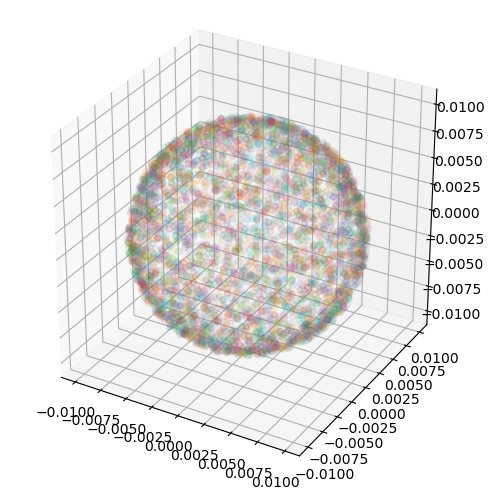

Campo debido a una esfera hueca con carga solución MC: 10771194.93 N/C
Campo debido a una esfera hueca con carga solución teórica: 10800000.0 N/C


In [25]:
dr = R / 20 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(aspect = 'equal' , projection='3d')
i=0
Es = np.array([0,0,0]) #campo eléctrico debido a la esfera (donde iremos sumando los dE debidos a cada dQ)

while i < n:
    # para la posicion de 'dq' tengo que generar dos numeros random entre -1 y 1 para mis coordenadas x, y,z.
    rx = R *(np.random.random() * 2-1)
    ry = R *(np.random.random() * 2-1)
    rz = R *(np.random.random() * 2-1)
    #creo el vector posición
    rt = np.array([rx,ry,rz])
    if np.linalg.norm(rt) >= R - dr and np.linalg.norm(rt) <= R : # solo la voy a tener en cuenta si el modulo de la posición es menor al radio de la esfera (es decir, la carga está dentro de ella)
        ax.scatter(rt[0],rt[1],rt[2], alpha=0.1)
        Es = Es + E(rt,ro,dq)
        i+=1
plt.show()
print(f'Campo debido a una esfera hueca con carga solución MC: {str(round(np.linalg.norm(Es),2))} N/C')
print(f'Campo debido a una esfera hueca con carga solución teórica: {str(round(Et,2))} N/C')